<a href="https://colab.research.google.com/github/Lipe467/Titanic/blob/main/TrabalhoTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree
from tkinter import Label


In [5]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

In [6]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


sobreviventes e não sobreviventes

In [8]:
train_df.value_counts('Survived')

Survived
0    549
1    342
dtype: int64

In [9]:
surv = train_df.value_counts('Survived')
rate_surv = sum(surv)/len(surv)
print("% total de sobreviventes", rate_surv)

% total de sobreviventes 445.5


Porcentagem de mulheres que sobreviveram


In [10]:
women = train_df.loc[train_df.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% Mulheres que sobreviviram:", rate_women)

% Mulheres que sobreviviram: 0.7420382165605095


porcentagem dos Homens que sobreviveram

In [11]:
man = train_df.loc[train_df.Sex == 'male']["Survived"]
rate_man = sum(man)/len(man)

print("% Homens que sobreviviram:", rate_man)

% Homens que sobreviviram: 0.18890814558058924


porcentagem da soma de mulheres e homens idependente de classe que sobreviveram

In [12]:
print("Total", (rate_man + rate_women))

Total 0.9309463621410987


Gráfico masculino e feminino de sobreviventes

<Axes: xlabel='Sex', ylabel='count'>

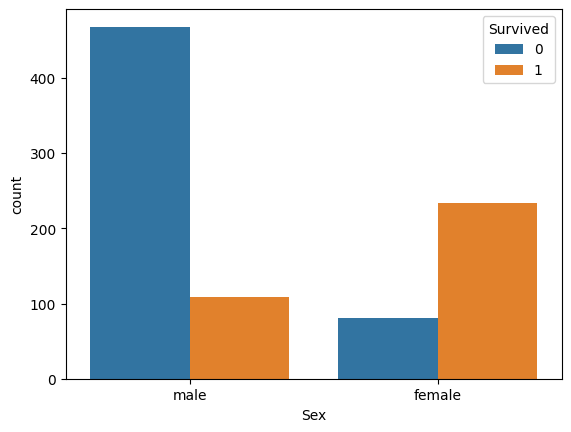

In [13]:
sns.countplot(data=train_df, x="Sex",hue="Survived" )

Gráfico de sobreventes por Classe

<Axes: xlabel='Pclass', ylabel='count'>

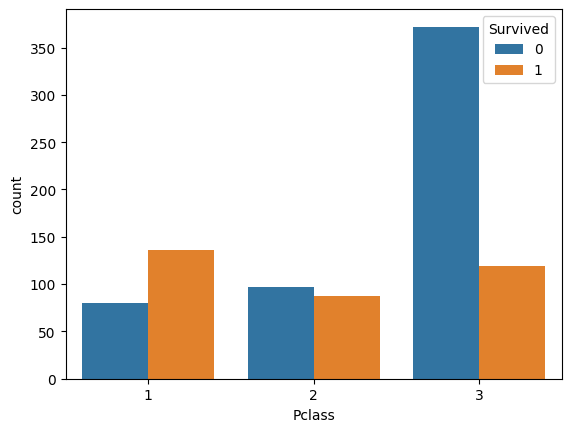

In [14]:
sns.countplot(data=train_df, x="Pclass",hue="Survived" )

Média de idade dos passageiros


In [15]:
test_df['Age'].mean()

30.272590361445783

In [16]:
train_df['Age'].mean()

29.69911764705882

In [18]:
fare = test_df['Fare'].var()

Elaborando Histograma para mostrar a faixa de idade dos passageiros

<ipython-input-19-1b76351c623c>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


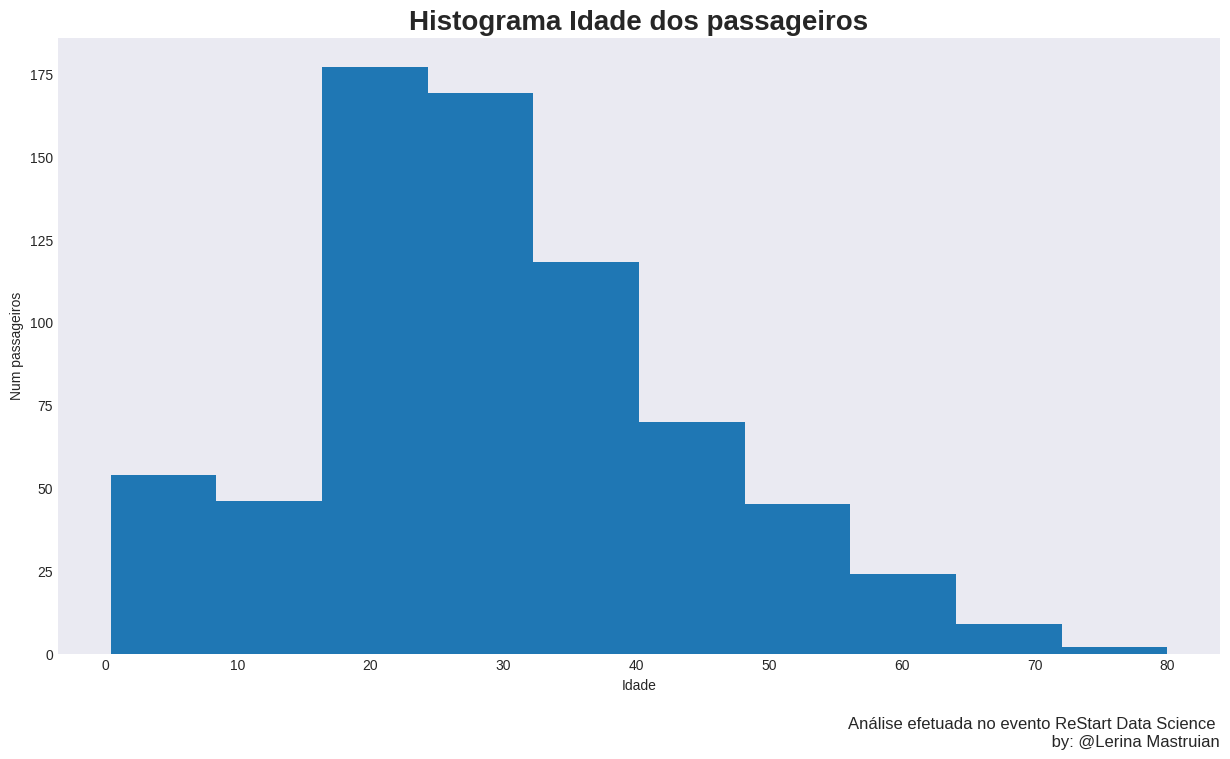

In [19]:


# Tamanho
plt.figure( figsize=(15, 8) )

# estilo
plt.style.use('seaborn-dark')

#Titulo do grafico
plt.title('Histograma Idade dos passageiros', fontsize=20, fontweight='bold')

plt.hist(train_df.Age)
plt.xlabel('Idade')
plt.ylabel('Num passageiros')
plt.savefig('histograma_idade.png')

plt.annotate(
    'Análise efetuada no evento ReStart Data Science \n by: @Lerina Mastruian',
    xy=(1, -0.15), xycoords='axes fraction', ha='right', fontsize=12
);

#Mostrar o histograma
plt.show()




HeatMap (fonte ChatGPT)

<ipython-input-20-f70536a56cdf>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


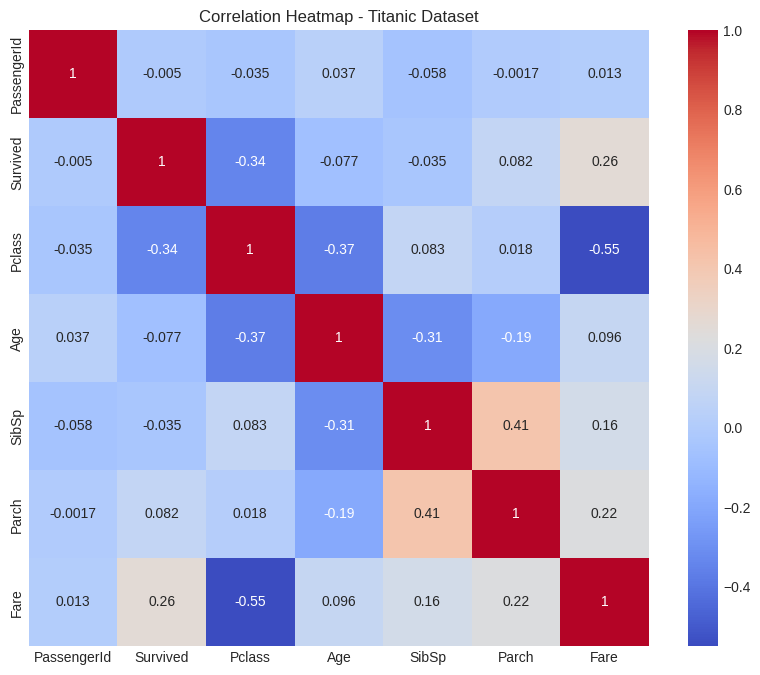

In [20]:
data = pd.read_csv('train.csv')

# Calcular a matriz de correlação
correlation_matrix = data.corr()

# Criar o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Configurar o título do heatmap
plt.title('Correlation Heatmap - Titanic Dataset')

# Exibir o heatmap
plt.show()

In [21]:
total = train_df.loc[train_df.Pclass == 3]["Survived"]
rate_class3 = sum(total)/len(total)

print("% sobreviviram:", rate_class3)

% sobreviviram: 0.24236252545824846


porcentagem de sobreviventes segunda classe

In [22]:
total = train_df.loc[train_df.Pclass == 2]["Survived"]
rate_class2 = sum(total)/len(total)

print("% sobreviviram:", rate_class2)

% sobreviviram: 0.47282608695652173


 porcentagem Sobreviventes primeira classe

In [23]:
total = train_df.loc[train_df.Pclass == 1]["Survived"]
rate_class1 = sum(total)/len(total)

print("% sobreviviram:", rate_class1)

% sobreviviram: 0.6296296296296297


Distribuição das idades dos Sobreviventes x Mortos


<ipython-input-24-9635c34c150a>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your 

<Figure size 2000x800 with 0 Axes>

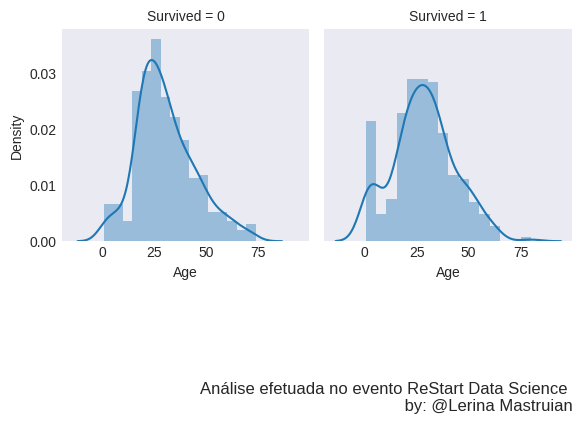

In [24]:
# Tamanho
plt.figure( figsize=(20, 8) )

# estilo
plt.style.use('seaborn-dark')

age_survived = sns.FacetGrid(train_df, col='Survived')
age_survived.map(sns.distplot, 'Age')

plt.annotate(
    'Análise efetuada no evento ReStart Data Science \n by: @Lerina Mastruian',
    xy=(1, -0.8), xycoords='axes fraction', ha='right', fontsize=12
);

In [25]:
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")

In [26]:
X = df_train[['Age', 'Sex', 'Fare','Pclass','Parch']]
y = df_train['Survived']



In [27]:
age_mean = X['Age'].mean()
X['Age'].fillna(age_mean, inplace=True)
X['Sex'] = X['Sex'].map({'female': 0, 'male': 1})



<ipython-input-27-e5d052f166a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'].fillna(age_mean, inplace=True)
<ipython-input-27-e5d052f166a1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].map({'female': 0, 'male': 1})


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=418, random_state=50)

In [29]:
regressao_linear = LinearRegression()


In [30]:
regressao_linear.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred = regressao_linear.predict(X_test)

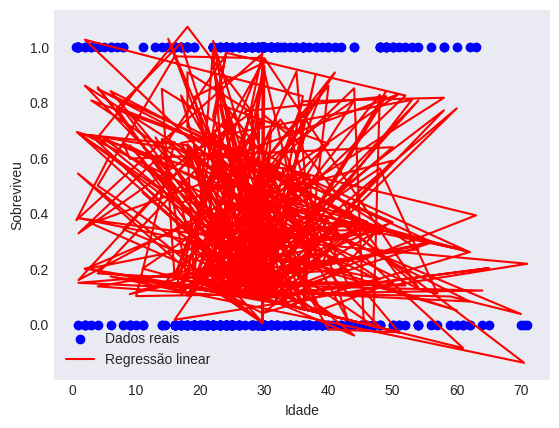

In [38]:
plt.scatter(X_test['Age'], y_test, color='blue', label='Dados reais')
plt.plot(X_test['Age'], y_pred, color='red', label='Regressão linear')
plt.xlabel('Idade')
plt.ylabel('Sobreviveu')
plt.legend()
plt.show()


In [39]:
y_pred


array([ 0.8459391 ,  0.26704326,  0.14184753,  0.53712063,  0.19973918,
        0.35839888, -0.0272367 ,  0.09281807,  0.93247382,  0.6022052 ,
        0.75363484,  0.68075647,  0.01725009,  0.58111958,  0.13670078,
        0.09794888,  0.79338587,  0.65296294,  0.44610548,  0.0414286 ,
        0.26180427,  0.50861078,  0.76904815,  1.07406505,  0.67543198,
        0.05162221,  0.03182984,  0.34386033,  0.73862371,  0.16099894,
        0.46600412,  0.37580443,  0.09524622,  0.58131722,  0.71307177,
        0.91019968,  0.76490712,  0.09281807,  0.75832984,  0.26182463,
        0.7506489 ,  0.97323099,  0.66396588,  0.25938661,  0.23026477,
        0.05162803,  0.29789846,  0.69471253,  0.371803  ,  0.10797263,
        0.78005738,  1.01550582,  0.09250908,  0.30447574,  0.23590091,
        0.10793499,  0.20276966,  0.0679926 ,  0.2988396 ,  0.02877648,
        0.12459717,  0.09251691,  0.64670384,  0.09081326,  0.15306176,
        0.1417283 ,  0.0967584 ,  0.10826126,  0.80787211,  0.11

In [41]:
mse = mean_squared_error(y_test, y_pred)
print("Erro quadrático médio (MSE):", mse)

Erro quadrático médio (MSE): 0.14279504396129744


<ipython-input-42-8f11e6a02595>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Age'].fillna(features['Age'].median(), inplace=True)
<ipython-input-42-8f11e6a02595>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Fare'].fillna(features['Fare'].median(), inplace=True)


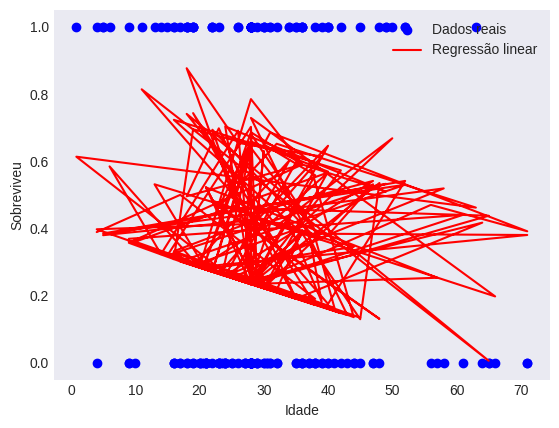

In [42]:
features = train_df[['Pclass', 'Age', 'Fare']]
target = train_df['Survived']

# Preencher valores ausentes
features['Age'].fillna(features['Age'].median(), inplace=True)
features['Fare'].fillna(features['Fare'].median(), inplace=True)

# Dividir os dados em conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Criar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)
y_pred = model.predict(X_test)


# Plotar gráfico de dispersão com a reta de regressão
plt.scatter(X_test['Age'], y_test, color='blue', label='Dados reais')
plt.plot(X_test['Age'], y_pred.reshape(-1,1), color='red', label='Regressão linear')
plt.xlabel('Idade')
plt.ylabel('Sobreviveu')
plt.legend()
plt.show()


In [43]:
train_dummies = pd.get_dummies(train_df)

In [44]:
train_dummies

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,889,0,3,NaN,1,2,23.4500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
889,890,1,1,26.0,0,0,30.0000,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Árvore de decisão fonte do ChatGPT

<ipython-input-45-e8151da64cda>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Age'].fillna(features['Age'].median(), inplace=True)
<ipython-input-45-e8151da64cda>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Fare'].fillna(features['Fare'].median(), inplace=True)
<ipython-input-45-e8151da64cda>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['

Acurácia: 0.7318435754189944


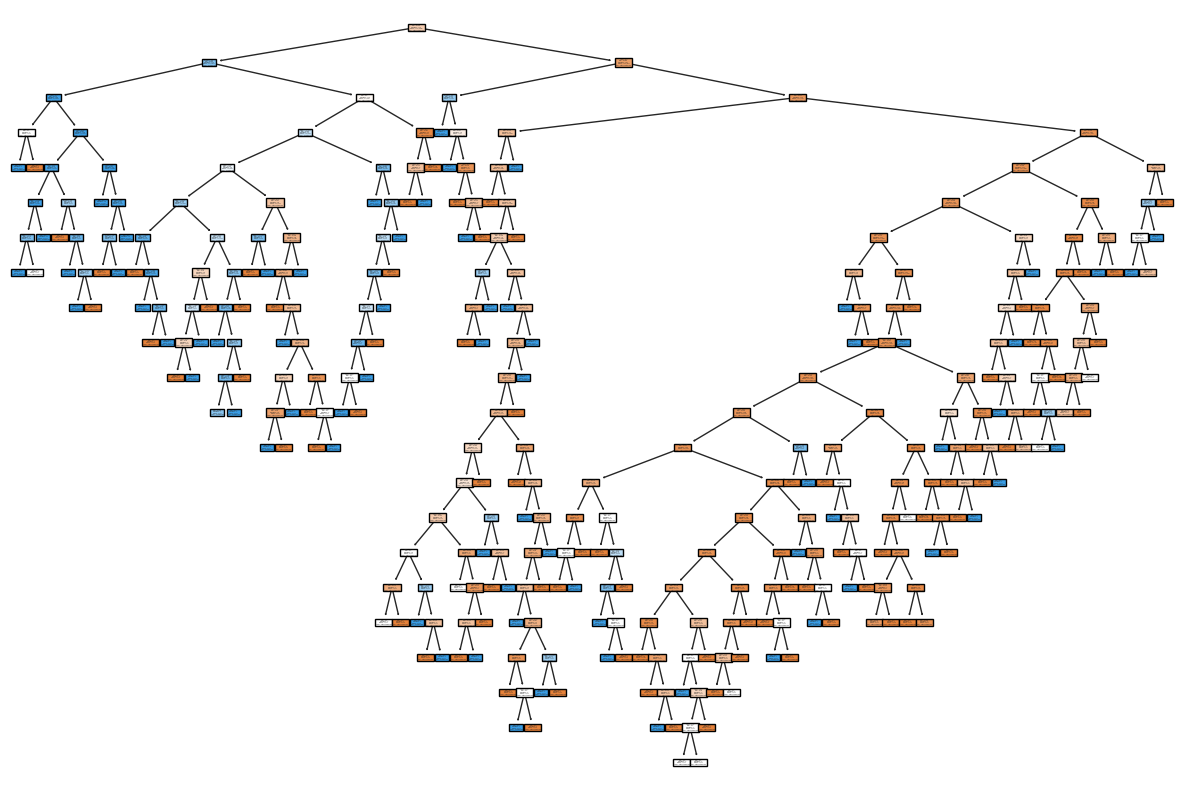

In [45]:
train_df = pd.read_csv('train.csv')

# Selecionar as colunas de recursos (features) e o rótulo (target)
features = train_df[['Pclass', 'Sex', 'Age', 'Fare']]
target = train_df['Survived']

# Preencher valores ausentes
features['Age'].fillna(features['Age'].median(), inplace=True)
features['Fare'].fillna(features['Fare'].median(), inplace=True)

# Converter variáveis categóricas em numéricas
features['Sex'] = features['Sex'].map({'female': 0, 'male': 1}).astype(int)

# Dividir os dados em conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Criar o modelo de árvore de decisão
model = DecisionTreeClassifier()

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcular a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

# Plotar a árvore de decisão
fig, ax = plt.subplots(figsize=(15, 10))
tree.plot_tree(model, feature_names=features.columns, class_names=['Não sobreviveu', 'Sobreviveu'], filled=True)
plt.show()

Árvore de decisão quantidade de pessoas que sobreviveriam e morreriam (fonte dica de ouro de colega)

In [46]:

from sklearn.ensemble import RandomForestClassifier

df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")

X_train = df_train[['Parch', 'Sex', 'Age', 'Fare']]
y_train = df_train['Survived']

X_train['Sex'] = X_train['Sex'].map({'female': 0, 'male': 1})
X_train['Age'].fillna(X_train['Age'].mean(), inplace=True)

X_test = df_test[['Parch', 'Sex', 'Age', 'Fare']]
randomForest = RandomForestClassifier(n_estimators=418, random_state=50)

randomForest.fit(X_train, y_train)

X_test['Sex'] = X_test['Sex'].map({'female': 0, 'male': 1})
X_test['Age'].fillna(X_test['Age'].mean(), inplace=True)
X_test['Fare'].fillna(X_test['Fare'].mean(), inplace=True)

y_pred = randomForest.predict(X_test)
y_pred

df_test['Survived'] = y_pred
df_test[['PassengerId','Survived']]

<ipython-input-46-f76a36271eee>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Sex'] = X_train['Sex'].map({'female': 0, 'male': 1})
<ipython-input-46-f76a36271eee>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Age'].fillna(X_train['Age'].mean(), inplace=True)
<ipython-input-46-f76a36271eee>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [47]:
df_test[['Survived']].value_counts()
df_test['Survived'].value_counts()

0    279
1    139
Name: Survived, dtype: int64

Aqui observamos alguns Gráficos e Calculos que são representados como forma de números que concluem sobrêvivencias ou não dos passageiros e suas probabilidades, concluem-se como forma de dados certos parâmetros sobre a tragédia do Titanic
